In [2]:
# 초기 설정
import sys
assert sys.version_info >= (3, 5)
import sklearn
assert sklearn.__version__ >= "0.20"
import numpy as np
import os
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore", message="internal gelsd")

mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

PROJECT_ROOT_DIR = "."
CHARTER_ID = "end_to_end_project"
IMAGE_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHARTER_ID)
os.makedirs(IMAGE_PATH, exist_ok=True)

# 그림을 저장하는 method
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution = 300):
    path = os.path.join(IMAGE_PATH, fig_id + "."+ fig_extension)
    print("그림 저장", path, fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

## SVM (분류 : Classification)

### 얼굴 이미지 분류

#### dataset download

In [25]:
from sklearn.datasets import fetch_olivetti_faces
faces = fetch_olivetti_faces()
print(faces.target.shape)
print(faces.data.shape)

(400,)
(400, 4096)


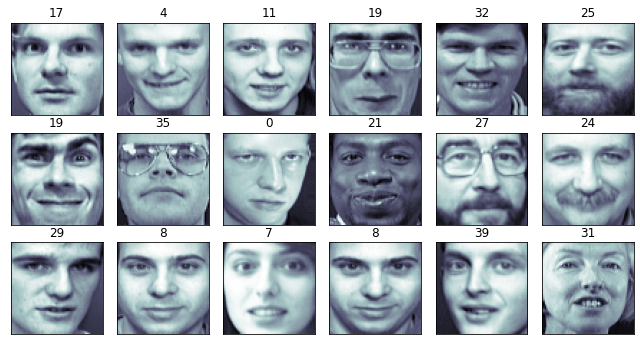

In [26]:
N = 3
M = 6
np.random.seed(0)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(faces.data)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(faces.images[k], cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title(faces.target[k])
plt.tight_layout()
plt.show()

#### Split Train & Test DataSet

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(faces.data, faces.target, test_size=0.4, random_state=0)

In [28]:
from sklearn.svm import SVC
svc = SVC(kernel='linear').fit(X_train, y_train)

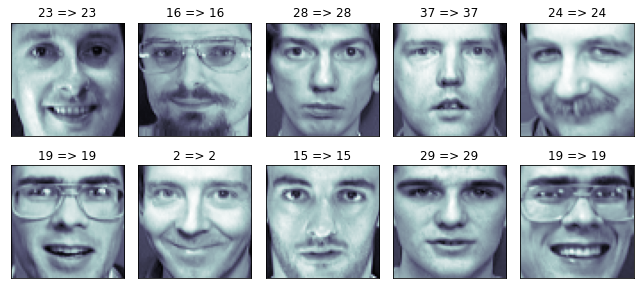

In [29]:
N = 2
M = 5
np.random.seed(4)
fig = plt.figure(figsize=(9, 5))
plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
klist = np.random.choice(range(len(y_test)), N * M)

for i in range(N):
    for j in range(M):
        k = klist[i * M + j]
        ax = fig.add_subplot(N, M, i*M+j+1)
        ax.imshow(X_test[k:(k+1), :].reshape(64, 64), cmap=plt.cm.bone)
        ax.grid(False)
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.title("%d => %d" %(y_test[k], svc.predict(X_test[k:(k+1),:])[0]))
plt.tight_layout()
plt.show()

#### Train accuracy

In [30]:
from sklearn.metrics import classification_report, accuracy_score

y_pred_train = svc.predict(X_train)
y_pred_test = svc.predict(X_test)

In [31]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00         8
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         4
           7       1.00      1.00      1.00         7
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00         7
          10       1.00      1.00      1.00         4
          11       1.00      1.00      1.00         6
          12       1.00      1.00      1.00         6
          13       1.00      1.00      1.00         6
          14       1.00      1.00      1.00         4
          15       1.00      1.00      1.00         4
          16       1.00      1.00      1.00         8
          17       1.00    

#### Test accuracy

In [32]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.86      1.00      0.92         6
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00         4
           3       0.50      1.00      0.67         2
           4       1.00      0.50      0.67         2
           5       1.00      1.00      1.00         5
           6       0.83      0.83      0.83         6
           7       1.00      0.67      0.80         3
           8       0.67      1.00      0.80         2
           9       1.00      1.00      1.00         3
          10       1.00      1.00      1.00         6
          11       1.00      1.00      1.00         4
          12       0.67      1.00      0.80         4
          13       1.00      1.00      1.00         4
          14       1.00      1.00      1.00         6
          15       1.00      0.33      0.50         6
          16       0.67      1.00      0.80         2
          17       1.00    